Number of particles: 18
Center of mass for particle 1: (34.80392156862745, 56.88235294117647)
Center of mass for particle 2: (101.87068965517241, 87.72413793103448)
Center of mass for particle 3: (240.97826086956522, 486.19565217391306)
Center of mass for particle 4: (291.9387755102041, 853.0816326530612)
Center of mass for particle 5: (344.0, 683.0)
Center of mass for particle 6: (406.0, 936.0)
Center of mass for particle 7: (408.42857142857144, 938.8571428571429)
Center of mass for particle 8: (493.63953488372096, 255.7674418604651)
Center of mass for particle 9: (506.2906976744186, 506.1860465116279)
Center of mass for particle 10: (512.0, 507.0)
Center of mass for particle 11: (590.0, 43.0)
Center of mass for particle 12: (594.0714285714286, 43.80357142857143)
Center of mass for particle 13: (700.0561403508772, 604.0)
Center of mass for particle 14: (709.0, 608.0)
Center of mass for particle 15: (860.3333333333334, 646.3333333333334)
Center of mass for particle 16: (862.0, 645.0)
C

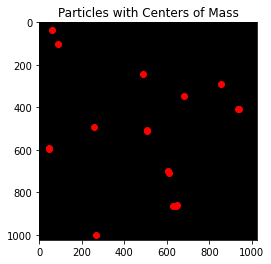

In [4]:
from PIL import Image
import numpy as np
from scipy.ndimage import label, center_of_mass
import matplotlib.pyplot as plt

def calculate_centers_of_mass(image_path):
    # Load the thresholded image
    img = Image.open(r'C:\Users\sqjac\OneDrive\Desktop\slices_rsr_khp\binary images\C2-Rsr_0k_A1-0001.tif')
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    
    # Ensure the image is binary (if it's not already binary)
    binary_img = img_array > 0  # Assuming non-zero pixels represent particles
    
    # Label each connected component (particle)
    labeled_img, num_features = label(binary_img)
    
    # Calculate the center of mass for each labeled particle
    centers_of_mass = center_of_mass(binary_img, labeled_img, range(1, num_features + 1))
    
    return centers_of_mass, labeled_img, num_features

# Example usage
image_path = 'thresholded_particles.tif'  # Replace with your image path
centers_of_mass, labeled_img, num_features = calculate_centers_of_mass(image_path)

print(f"Number of particles: {num_features}")
for i, com in enumerate(centers_of_mass, start=1):
    print(f"Center of mass for particle {i}: {com}")

# Optional: Plot the image and mark the center of mass for each particle
plt.imshow(labeled_img, cmap='nipy_spectral')  # Display different particles in different colors
for com in centers_of_mass:
    plt.scatter(com[1], com[0], color='red')  # Plot each center of mass
plt.title("Particles with Centers of Mass")
plt.show()



Number of particles in image 1: 118
Number of particles in image 2: 18
Particle 1 in image 1 is closest to particle 1 in image 2 with a distance of 3.289366816029436
Particle 2 in image 1 is closest to particle 2 in image 2 with a distance of 10.271969727048713
Particle 3 in image 1 is closest to particle 1 in image 2 with a distance of 1.034653098372913
Particle 4 in image 1 is closest to particle 3 in image 2 with a distance of 14.246203662850842
Particle 5 in image 1 is closest to particle 1 in image 2 with a distance of 1.3506483972592387
Particle 6 in image 1 is closest to particle 3 in image 2 with a distance of 16.508059018024603
Particle 7 in image 1 is closest to particle 3 in image 2 with a distance of 16.529964698093664
Particle 8 in image 1 is closest to particle 3 in image 2 with a distance of 15.165698995390706
Particle 9 in image 1 is closest to particle 4 in image 2 with a distance of 15.224085683830072
Particle 10 in image 1 is closest to particle 3 in image 2 with a d

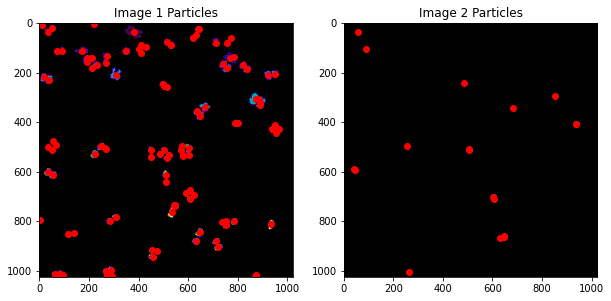

In [6]:
from PIL import Image
import numpy as np
from scipy.ndimage import label, center_of_mass
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def calculate_centers_of_mass(image_path):
    # Load the thresholded image
    img = Image.open(image_path)
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    
    # Ensure the image is binary (if it's not already binary)
    binary_img = img_array > 0  # Assuming non-zero pixels represent particles
    
    # Label each connected component (particle)
    labeled_img, num_features = label(binary_img)
    
    # Calculate the center of mass for each labeled particle
    centers_of_mass = center_of_mass(binary_img, labeled_img, range(1, num_features + 1))
    
    return centers_of_mass, labeled_img, num_features

def find_nearest_neighbors(centers1, centers2, scaling_factor=1.0):
    # Calculate the pairwise distances between all particles in both images
    distances = cdist(centers1, centers2)
    
    # Find the nearest neighbor in the second image for each particle in the first image
    nearest_neighbors = np.argmin(distances, axis=1)
    
    # Find the minimum distances and scale them by the provided factor
    min_distances = np.min(distances, axis=1) * scaling_factor
    
    return nearest_neighbors, min_distances

# Example usage
image_path1 = r'C:\Users\sqjac\OneDrive\Desktop\slices_rsr_khp\binary images\C1-Rsr_0k_A1-0001.tif'  # Replace with your first image path
image_path2 = r'C:\Users\sqjac\OneDrive\Desktop\slices_rsr_khp\binary images\C2-Rsr_0k_A1-0001.tif'  # Replace with your second image path

# Calculate centers of mass for particles in both images
centers_of_mass1, labeled_img1, num_features1 = calculate_centers_of_mass(image_path1)
centers_of_mass2, labeled_img2, num_features2 = calculate_centers_of_mass(image_path2)

# Find the nearest neighbors and distances
scaling_factor = 0.06200195312  # Distance scaling factor (e.g., pixel-to-micrometer conversion)
nearest_neighbors, distances = find_nearest_neighbors(centers_of_mass1, centers_of_mass2, scaling_factor)

# Display results
print(f"Number of particles in image 1: {num_features1}")
print(f"Number of particles in image 2: {num_features2}")
for i, (neighbor, distance) in enumerate(zip(nearest_neighbors, distances), start=1):
    print(f"Particle {i} in image 1 is closest to particle {neighbor + 1} in image 2 with a distance of {distance}")

# Optional: Plot the two images and the centers of mass
plt.figure(figsize=(10, 5))

# Plot image 1
plt.subplot(1, 2, 1)
plt.imshow(labeled_img1, cmap='nipy_spectral')
plt.title("Image 1 Particles")
for com in centers_of_mass1:
    plt.scatter(com[1], com[0], color='red')

# Plot image 2
plt.subplot(1, 2, 2)
plt.imshow(labeled_img2, cmap='nipy_spectral')
plt.title("Image 2 Particles")
for com in centers_of_mass2:
    plt.scatter(com[1], com[0], color='red')

plt.show()


Number of particles in image 1: 118
Number of particles in image 2: 18
Particle 1 in image 2 is closest to particle 3 in image 1 with a distance of 1.0347
Particle 2 in image 2 is closest to particle 18 in image 1 with a distance of 0.5929
Particle 3 in image 2 is closest to particle 41 in image 1 with a distance of 0.7899
Particle 4 in image 2 is closest to particle 44 in image 1 with a distance of 1.5302
Particle 5 in image 2 is closest to particle 48 in image 1 with a distance of 1.0032
Particle 6 in image 2 is closest to particle 54 in image 1 with a distance of 0.9983
Particle 7 in image 2 is closest to particle 54 in image 1 with a distance of 0.7778
Particle 8 in image 2 is closest to particle 60 in image 1 with a distance of 0.5200
Particle 9 in image 2 is closest to particle 68 in image 1 with a distance of 0.4337
Particle 10 in image 2 is closest to particle 68 in image 1 with a distance of 0.3331
Particle 11 in image 2 is closest to particle 78 in image 1 with a distance of 

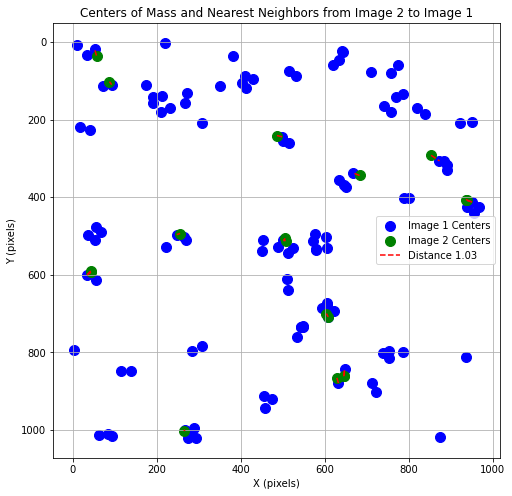

In [8]:
from PIL import Image
import numpy as np
from scipy.ndimage import label, center_of_mass
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def calculate_centers_of_mass(image_path):
    # Load the thresholded image
    img = Image.open(image_path)
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    
    # Ensure the image is binary (if it's not already binary)
    binary_img = img_array > 0  # Assuming non-zero pixels represent particles
    
    # Label each connected component (particle)
    labeled_img, num_features = label(binary_img)
    
    # Calculate the center of mass for each labeled particle
    centers_of_mass = center_of_mass(binary_img, labeled_img, range(1, num_features + 1))
    
    return centers_of_mass, labeled_img, num_features

def find_nearest_neighbors_from_image2(centers1, centers2, scaling_factor=1.0):
    # Calculate the pairwise distances between all particles in both images
    distances = cdist(centers2, centers1)  # Reverse the order: image 2 vs image 1
    
    # Find the nearest neighbor in image 1 for each particle in image 2
    nearest_neighbors = np.argmin(distances, axis=1)
    
    # Find the minimum distances and scale them by the provided factor
    min_distances = np.min(distances, axis=1) * scaling_factor
    
    return nearest_neighbors, min_distances

def plot_centers_and_distances(centers1, centers2, nearest_neighbors, distances):
    # Create a plot for centers of mass in both images
    plt.figure(figsize=(8, 8))
    
    # Convert centers to numpy arrays for easy manipulation
    centers1 = np.array(centers1)
    centers2 = np.array(centers2)
    
    # Plot the centers of mass from both images
    plt.scatter(centers1[:, 1], centers1[:, 0], color='blue', label='Image 1 Centers', s=100)
    plt.scatter(centers2[:, 1], centers2[:, 0], color='green', label='Image 2 Centers', s=100)
    
    # Plot lines connecting nearest neighbors from image 2 to image 1
    for i, neighbor in enumerate(nearest_neighbors):
        plt.plot([centers2[i, 1], centers1[neighbor, 1]], 
                 [centers2[i, 0], centers1[neighbor, 0]], 
                 'r--', label=f'Distance {distances[i]:.2f}' if i == 0 else "")
    
    plt.legend()
    plt.title('Centers of Mass and Nearest Neighbors from Image 2 to Image 1')
    plt.xlabel('X (pixels)')
    plt.ylabel('Y (pixels)')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.grid(True)
    plt.show()

# Example usage
image_path1 = r'C:\Users\sqjac\OneDrive\Desktop\slices_rsr_khp\binary images\C1-Rsr_0k_A1-0001.tif'  # Replace with your first image path
image_path2 = r'C:\Users\sqjac\OneDrive\Desktop\slices_rsr_khp\binary images\C2-Rsr_0k_A1-0001.tif'  # Replace with your second image path

# Calculate centers of mass for particles in both images
centers_of_mass1, labeled_img1, num_features1 = calculate_centers_of_mass(image_path1)
centers_of_mass2, labeled_img2, num_features2 = calculate_centers_of_mass(image_path2)

# Find the nearest neighbors and distances from image 2 to image 1 with scaling factor
scaling_factor = 0.06200195312  # Scale factor to convert distances (e.g., pixel-to-micrometer)
nearest_neighbors, distances = find_nearest_neighbors_from_image2(centers_of_mass1, centers_of_mass2, scaling_factor)

# Display results
print(f"Number of particles in image 1: {num_features1}")
print(f"Number of particles in image 2: {num_features2}")
for i, (neighbor, distance) in enumerate(zip(nearest_neighbors, distances), start=1):
    print(f"Particle {i} in image 2 is closest to particle {neighbor + 1} in image 1 with a distance of {distance:.4f}")

# Plot the centers and the lines connecting the nearest neighbors
plot_centers_and_distances(centers_of_mass1, centers_of_mass2, nearest_neighbors, distances)
